<div class="alert alert-block alert-success">
    
# Property Data Transformation
#### Created by: Robiatul Adawiyah Al-Qosh
#### Date: 11/11/2024
#### Environment: Python 3.10

Libraries used:
* pandas (for data manipulation and preprocessing tasks such as handling data frames, reading files, and cleaning data)
* numpy (for numerical operations like logarithmic and mathematical transformations)
* seaborn (for data visualization, including scatter plots, histograms, and box plots)
* matplotlib.pyplot (for creating and customizing visualizations such as scatter plots, histograms, and residual plots)
* sklearn.preprocessing.StandardScaler (for standardizing features by scaling them to have zero mean and unit variance)
* sklearn.preprocessing.MinMaxScaler (for scaling features to a fixed range, typically [0, 1])
* sklearn.preprocessing.PowerTransformer (for stabilizing variance and making data more Gaussian-like using Box-Cox or Yeo-Johnson transformations)
* sklearn.linear_model.LinearRegression (for fitting linear regression models to evaluate residuals and test assumptions)


   
</div>

<div class="alert alert-block alert-info">
    
## Table of Contents

</div>

[1. Introduction](#Intro) <br>
[2. Importing Libraries and Loading The Data](#Import) <br>
[3. Data Preprocessing](#process) <br>
[4. Exploratory Data Analysis (EDA)](#EDA) <br>
[5. Normalization](#normal) <br>
$\;\;\;\;$[5.1. Standardization](#standar) <br>
$\;\;\;\;$[5.2. Min-Max Scaling](#min-max) <br>
$\;\;\;\;$[5.3. Log Transformation](#log) <br>
$\;\;\;\;$[5.4. Power Transformation](#power) <br>
[6. Evaluate Normalization Transformations](#transform) <br>
$\;\;\;\;$[6.1. Compare Correlations with the Target Variable](#corr) <br>
$\;\;\;\;$[6.2. Visualize Linearity with Scatter Plots](#scatter) <br>
$\;\;\;\;$[6.3. Check Normality of Feature Distributions](#QQ) <br>
$\;\;\;\;$[6.4. Evaluate Homoscedasticity](#residual) <br>
[7. Summary](#summary) <br>
[8. References](#Ref) <br>

<div class="alert alert-block alert-warning">

## 1.  Introduction  <a class="anchor" name="Intro"></a>

</div>

This data reshaping task focuses on preparing suburb-related property data for predictive modeling. The goal is to analyze and apply various data transformations—such as standardization, min-max scaling, log transformation, and power transformation—to key features like number_of_houses, number_of_units, population, aus_born_perc, median_income, median_house_price. These transformations aim to address skewness, ensure features are on similar scales, and improve linear relationships with the target variable, enabling better performance for future linear regression models.

In [149]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<div class="alert alert-block alert-warning">

## 2.  Importing Libraries and Loading The Data <a class="anchor" name="Import"></a>

</div>

First of all, all the necessary libraries need to be imported.

In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.linear_model import LinearRegression

Then, load the file that contains suburb information needed.

In [ ]:
suburb_info = pd.read_excel('robiatulaa/DataScienceProject/suburb_info.xlsx')
# Plese adjust the path

suburb_info

,suburb,number_of_houses,number_of_units,municipality,aus_born_perc,median_income,median_house_price,population
0,ABBOTSFORD,2304,4706,Yarra,68%,"$1,797","$1,299,400",4025
1,ABERFELDIE,1410,453,Moonee Valley,81%,"$1,571","$1,926,600",22442
2,ALBANVALE,1897,138,Brimbank,46%,$907,"$594,200",54005
3,ALBION,1389,1392,Brimbank,52%,$929,"$739,100",30677
4,ALPHINGTON,1729,1099,Darebin,73%,"$1,538","$1,729,600",9227
...,...,...,...,...,...,...,...,...
197,WILLIAMS LANDING,2735,173,Wyndham,87%,"$1,842","$866,400",170
198,WINDSOR,2201,4448,Stonnington,66%,"$1,560","$1,629,600",17776
199,WOLLERT,6516,259,Whittlesea,80%,"$1,355","$704,700",350
200,YALLAMBIE,1286,81,Banyule,79%,"$1,458","$998,200",12063


<div class="alert alert-block alert-warning">

## 3.  Data Cleaning  <a class="anchor" name="clean"></a>

</div>

At the data cleaning stage, several executions will be carried out to ensure the data is clean and free from anomalies, such as missing value. However, first of all, let's find out data information from the suburb_info dataset.

In [152]:
suburb_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   suburb              202 non-null    object
 1   number_of_houses    202 non-null    int64 
 2   number_of_units     202 non-null    int64 
 3   municipality        202 non-null    object
 4   aus_born_perc       202 non-null    object
 5   median_income       202 non-null    object
 6   median_house_price  202 non-null    object
 7   population          202 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 12.8+ KB


In the information above, it can be seen that the suburb_info dataset has 8 columns and 202 rows without any missing value. Unfortunately, there are some errors in the data type for some variables, such as aus_born_perc, median_income, and median_house_price, which should be numeric data such as int.

In [153]:
def clean_to_float(value):
    """
    Cleans a string by removing %, $, commas, and converts to float.
    Handles missing or invalid values gracefully.
    """
    try:
        # Remove %, $, and commas
        value = value.replace('%', '').replace('$', '').replace(',', '')
        return int(value)
    except:
        # Return NaN for invalid or missing values
        return int('nan')

# Apply the cleaning function to the relevant columns
suburb_info['aus_born_perc'] = suburb_info['aus_born_perc'].apply(clean_to_float)
suburb_info['median_income'] = suburb_info['median_income'].apply(clean_to_float)
suburb_info['median_house_price'] = suburb_info['median_house_price'].apply(clean_to_float)

In [154]:
suburb_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   suburb              202 non-null    object
 1   number_of_houses    202 non-null    int64 
 2   number_of_units     202 non-null    int64 
 3   municipality        202 non-null    object
 4   aus_born_perc       202 non-null    int64 
 5   median_income       202 non-null    int64 
 6   median_house_price  202 non-null    int64 
 7   population          202 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 12.8+ KB


In [155]:
print(suburb_info.isnull().sum())

suburb                0
number_of_houses      0
number_of_units       0
municipality          0
aus_born_perc         0
median_income         0
median_house_price    0
population            0
dtype: int64


<div class="alert alert-block alert-warning">

## 4.  Exploratory Data Analysis (EDA)  <a class="anchor" name="EDA"></a>

</div>

Exploratory Data Analysis is carried out to understand the contents of the data used, starting from distribution, frequency, correlation and others. Fisrt, let's look at the data description, to see statistical information from this dataset.

In [156]:
suburb_info.describe()

,number_of_houses,number_of_units,aus_born_perc,median_income,median_house_price,population
count,202.000000,202.000000,202.000000,202.000000,2.020000e+02,202.000000
mean,4155.767327,2480.410891,68.366337,1387.935644,1.218817e+06,18659.311881
std,3400.864988,3132.684712,10.761293,317.841321,4.716807e+05,9604.187282
min,283.000000,60.000000,36.000000,633.000000,5.072000e+05,170.000000
25%,1973.500000,620.500000,62.000000,1182.250000,8.706750e+05,12063.000000
50%,3256.500000,1603.000000,70.000000,1393.000000,1.134500e+06,17583.000000
75%,5518.500000,3089.000000,77.000000,1560.000000,1.467550e+06,24045.000000
max,23338.000000,24380.000000,88.000000,2352.000000,2.875800e+06,54005.000000


In [157]:
suburb_info.describe(include=['O'])

,suburb,municipality
count,202,202
unique,202,28
top,ABBOTSFORD,Banyule
freq,1,15


From the statistical info, it can be seen that there is a fairly large difference between the mean and median of several columns, such as number_of_houses and number_of_units. This indicates the possibility of outliers in the dataset. For more details, perhaps we can see the existence of outliers through a boxplot.

In [158]:
# Create the lists of column name which has median_house_price and hasn't
suburb_num_cols = ['number_of_houses', 'number_of_units', 'aus_born_perc', 'median_income', 'median_house_price', 'population']
suburb_feature_cols = ['number_of_houses', 'number_of_units', 'aus_born_perc', 'median_income', 'population']

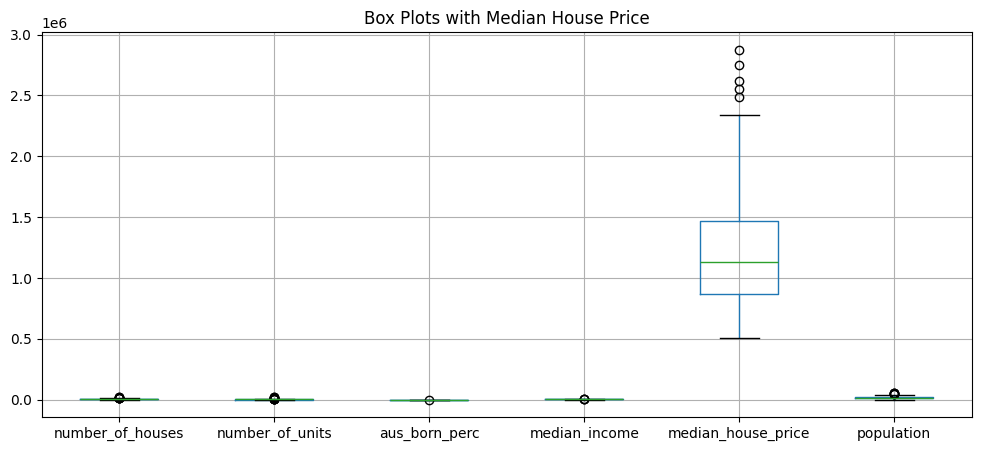

In [159]:
# Boxplot for distributions with median_house_price
suburb_info.boxplot(figsize=(12, 5))
plt.title("Box Plots with Median House Price")
plt.show()

In the boxplot diagram above, outliers cannot be seen because the median_house_price variable has a very different scale from the other variables. Therefore, let's look at the boxplot that does not contain the median_house_price variable.

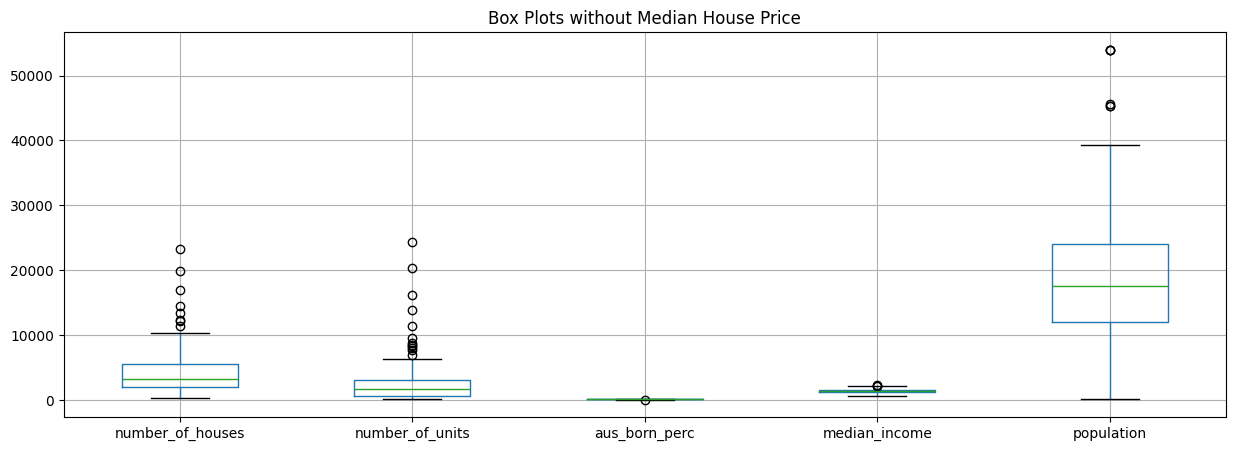

In [160]:
# Boxplot for distributions without median_house_price
suburb_info[suburb_feature_cols].boxplot(figsize=(15, 5))
plt.title("Box Plots without Median House Price")
plt.show()

Since it is still difficult to see the distribution data and outliers in the data even though the median_house_price variable has been eliminated, it is likely that a transformation is needed in the data. But before that, the distribution data can also be seen through the histogram.

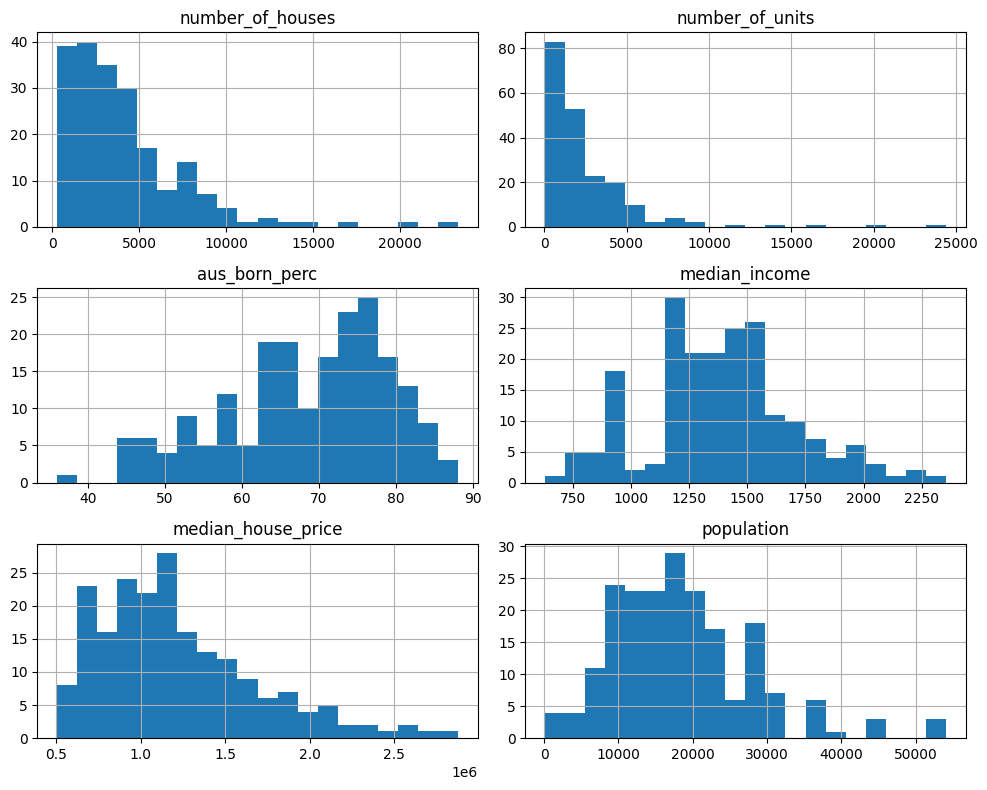

In [161]:
# Histograms for distributions
suburb_info[suburb_num_cols].hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()

From the histogram it can be seen that most of the columns have skewed data distribution. This is also indicated that data transformation is needed.

Moving on to the correlation data, it is mentioned that the five numeric data are needed to develop a linear model to predict the median_house_price, so they should have a correlation with the target variable. A correlation matrix in the form of a heatmap might help to see the correlation between variables.

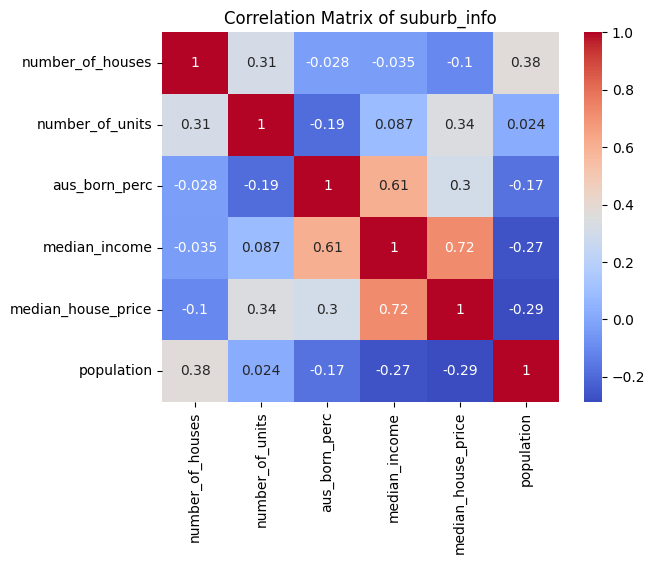

In [162]:
# Correlation Heatmap
sns.heatmap(suburb_info[suburb_num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of suburb_info')
plt.show()

From the correlation matrix, it can be seen that only median_income has a fairly strong correlation to median_house_price, besides it also has a correlation with aus_born_perc. However, what about the other variables? For more details, let's look at the correlation of each variable with the target in the scatter plot.

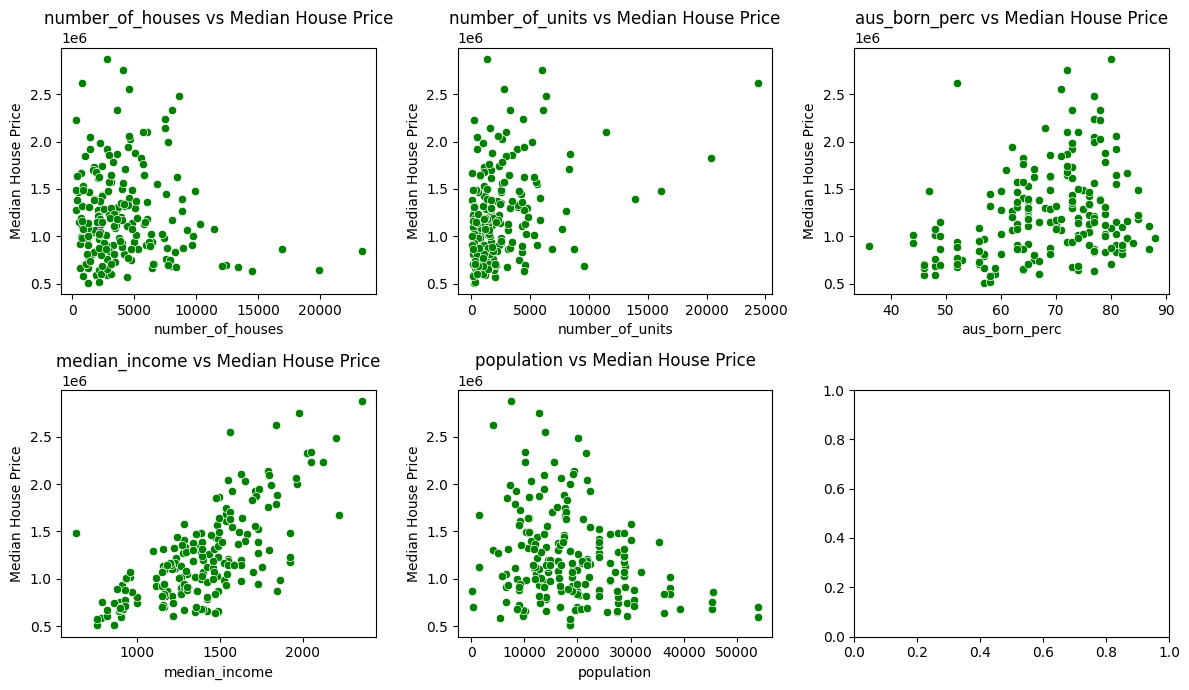

In [163]:
# Create subplots for scatter plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 7))
axes = axes.flatten()

# Plot scatter plots
for i, column in enumerate(suburb_feature_cols):
    sns.scatterplot(x=suburb_info[column], y=suburb_info['median_house_price'], color='green', ax=axes[i])
    axes[i].set_title(f'{column} vs Median House Price')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Median House Price')

plt.tight_layout()
plt.show()


From the scatter plots above, it is true that it seems that only median_income affects median_house_price in this dataset. However, since it is mentioned that 4 other variables (number_of_houses, number_of_units, aus_born_perc, and population) are needed to build a linear model, data scaling or data transformation is really needed.

<div class="alert alert-block alert-warning">

## 5.  Normalization  <a class="anchor" name="normal"></a>

</div>

Normalization and transformation are critical steps in data preprocessing, particularly when preparing features for linear regression modeling. These techniques ensure that the data meets the assumptions of the regression model and improves the model's performance by enhancing interpretability, reducing bias, and stabilizing numerical computations.

<div class="alert alert-block alert-info">
   
### 5.1. Standardization <a class="anchor" name="standar"></a>

</div>

Standardization transforms the features so that they have a mean of zero and a standard deviation of one. This is particularly important for algorithms sensitive to feature magnitude, such as linear regression.

Reason for Standardization: In datasets where features have significantly different scales (e.g., number_of_houses ranging in thousands while aus_born_perc is a percentage), large-magnitude features may dominate the regression coefficients, skewing the results. Standardization ensures that all features are weighted equally, allowing the regression model to focus on the relationships rather than feature magnitudes.

Benefits: Standardized features are comparable, and their effects on the target variable can be directly interpreted.

In [164]:
scaler = StandardScaler()
data_standardized = pd.DataFrame(
    scaler.fit_transform(suburb_info[suburb_num_cols]),
    columns=suburb_num_cols
)

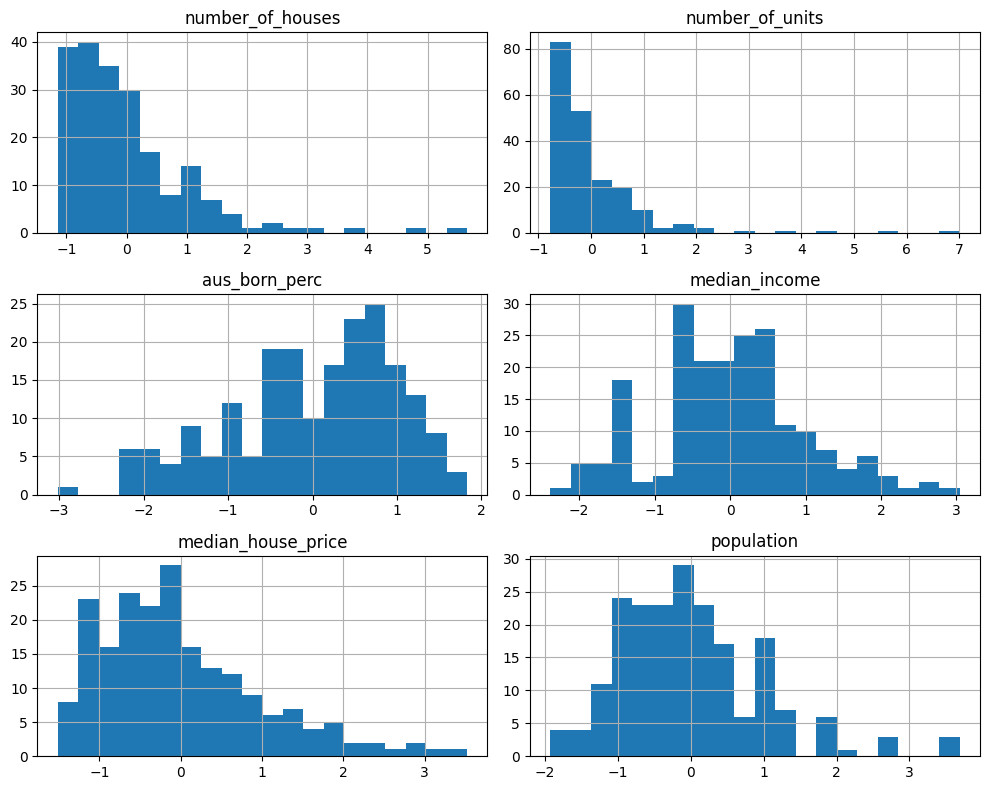

In [165]:
# Histograms for distributions
data_standardized[suburb_num_cols].hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()

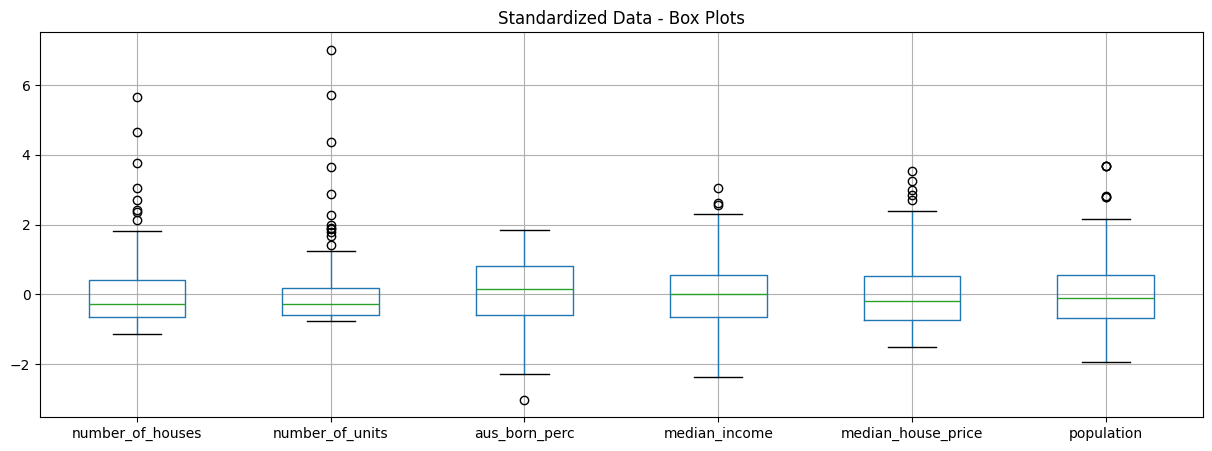

In [166]:
# Create the boxplot to identify the outliers
data_standardized[suburb_num_cols].boxplot(figsize=(15, 5))
plt.title("Standardized Data - Box Plots")
plt.show()

Standardization scales features to have a mean of zero and a standard deviation of one, reducing skewness to some extent. However, it struggles with highly skewed data and retains outliers, which can still heavily influence the results.

<div class="alert alert-block alert-info">
   
### 5.2. Min-Max Scaling <a class="anchor" name="min-max"></a>

</div>

Min-Max Scaling compresses the data values into a fixed range, typically between 0 and 1. This transformation is especially useful when features have differing units (e.g., monetary values like median_income and counts like number_of_units).

Reason for Min-Max Scaling: Linear regression models and gradient-based optimization techniques often perform better when the input data lies within a consistent range. This helps avoid numerical instability and improves convergence during optimization.

Benefits: Relationships between the original values are preserved, making this technique suitable for data where relative proportions are more important than absolute differences.


In [167]:
minmax_scaler = MinMaxScaler()
data_minmax = pd.DataFrame(
    minmax_scaler.fit_transform(suburb_info[suburb_num_cols]),
    columns=suburb_num_cols
)

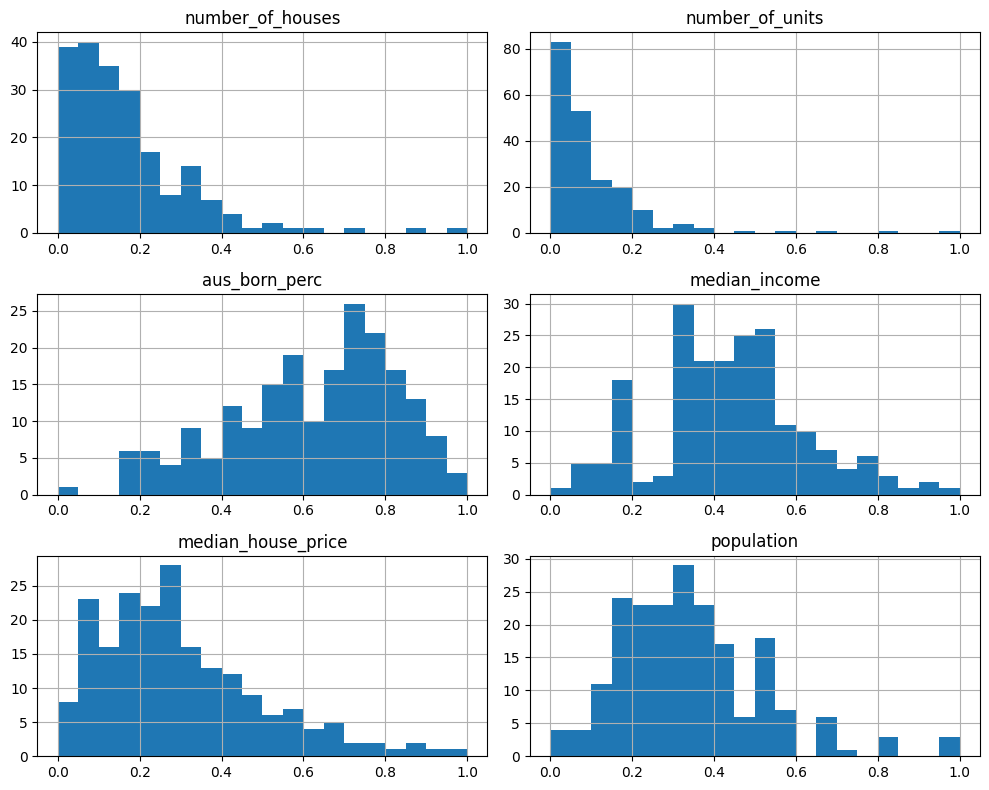

In [168]:
# Histograms for distributions
data_minmax[suburb_num_cols].hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()

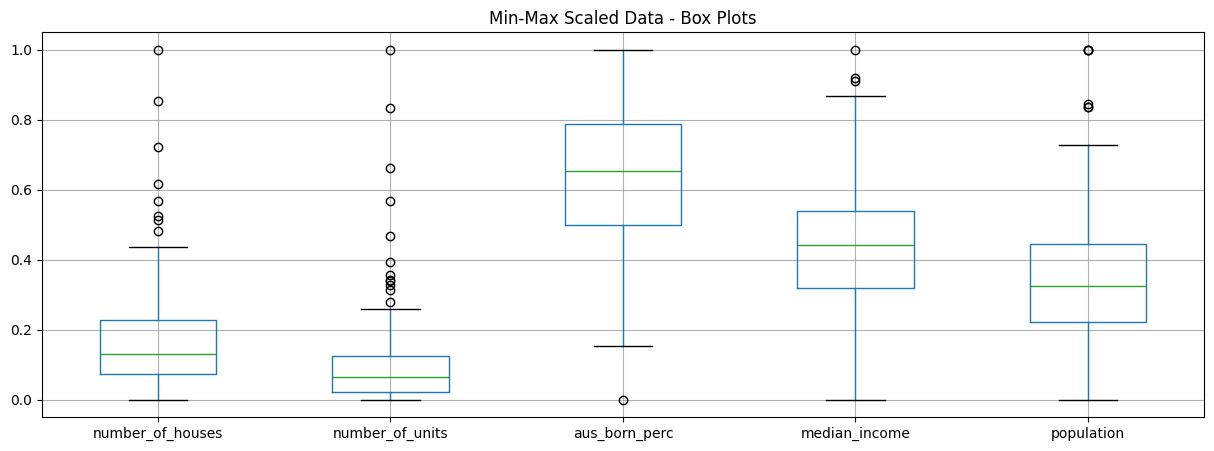

In [169]:
# Create the boxplot to identify the outliers
data_minmax[suburb_feature_cols].boxplot(figsize=(15, 5))
plt.title("Min-Max Scaled Data - Box Plots")
plt.show()

Min-Max Scaling normalizes features into a range (typically 0 to 1), effectively reducing skewness better than standardization for some variables. However, it does not address outliers, which remain present and influential after scaling.

<div class="alert alert-block alert-info">
   
### 5.3. Log Transformation <a class="anchor" name="log"></a>

</div>

Log transformation reduces the skewness of distributions by compressing large values more significantly than smaller ones. It is particularly effective for highly skewed features, such as population or median_income, which may have outliers or exponential growth patterns.

Reason for Log Transformation: Many features in real-world datasets exhibit right-skewed distributions, meaning a small number of observations have disproportionately high values. Log transformation stabilizes the variance and makes the data more symmetrical, which improves linear regression's assumption of normality and enhances the linearity of relationships with the target variable.

Benefits: The log-transformed features often show stronger linear relationships with the target, facilitating better model performance.


In [170]:
data_log = np.log1p(suburb_info[suburb_num_cols])

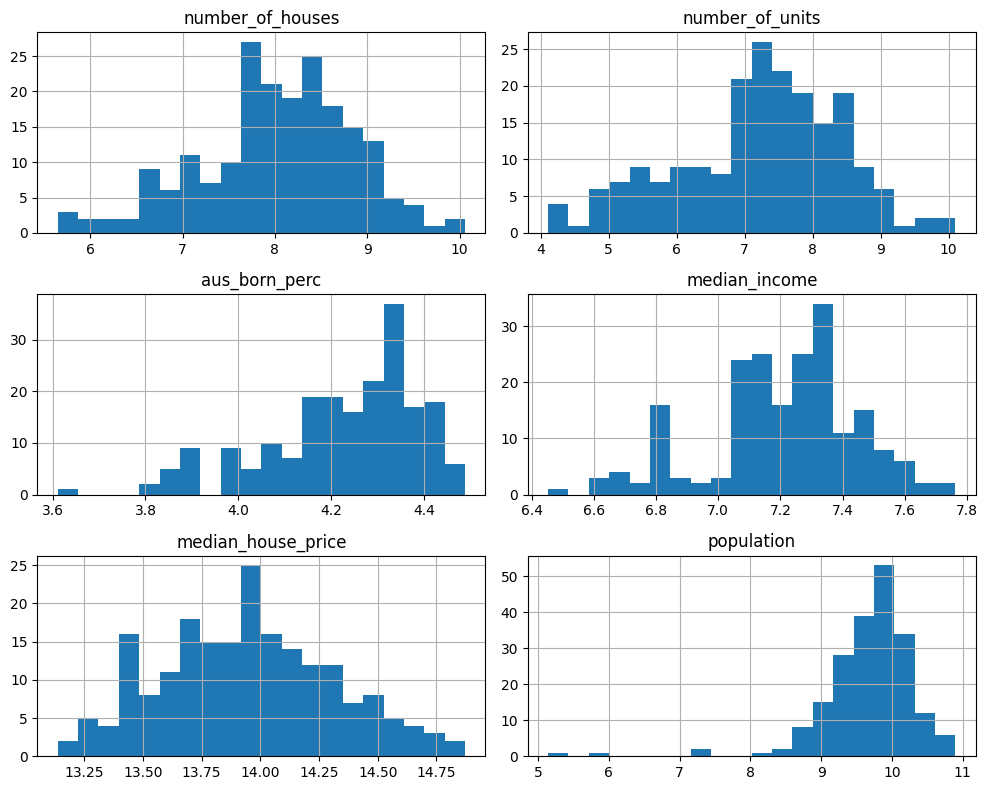

In [171]:
# Histograms for distributions
data_log[suburb_num_cols].hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()

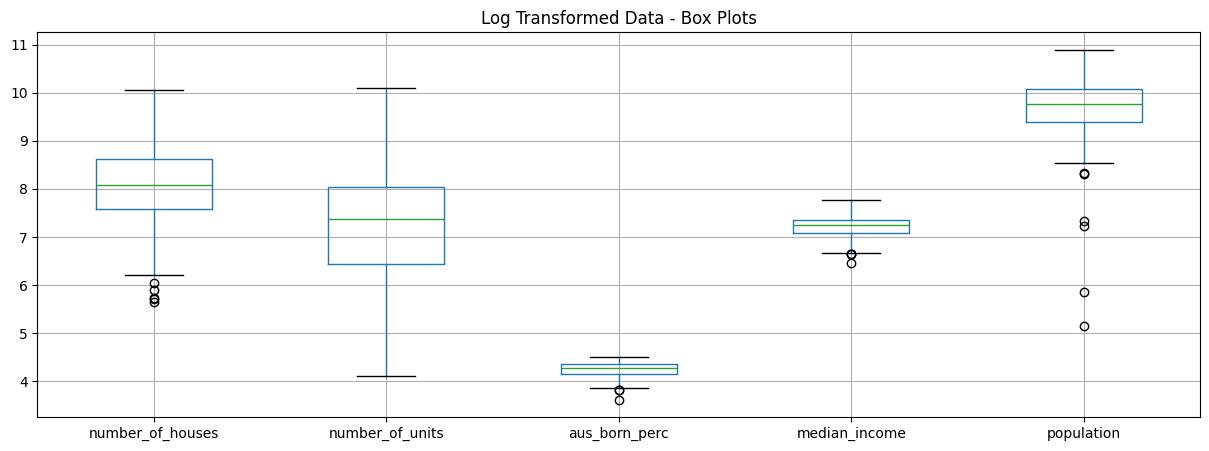

In [172]:
# Create the boxplot to identify the outliers
data_log[suburb_feature_cols].boxplot(figsize=(15, 5))
plt.title("Log Transformed Data - Box Plots")
plt.show()

Log transformation reduces skewness by compressing larger values but falls short in fully normalizing distributions with extreme skewness. Outliers also persist despite the transformation, limiting its ability to standardize highly skewed data.

<div class="alert alert-block alert-info">
   
### 5.4. Power Transformation <a class="anchor" name="power"></a>

</div>

Power transformations are used to stabilize variance and make the data more Gaussian-like. Unlike log transformation, power transformations can handle zero and negative values, making them more flexible.

Reason for Power Transformation: For features with high variance or non-Gaussian distributions, power transformations can reduce heteroscedasticity and improve the normality of the data. This ensures that the assumptions of linear regression, such as homoscedasticity (constant variance of residuals), are met.

Benefits: This technique improves the accuracy of statistical models by ensuring the data conforms to Gaussian distribution requirements and enhances interpretability of regression coefficients.

In [173]:
power_transformer = PowerTransformer()
data_power = pd.DataFrame(
    power_transformer.fit_transform(suburb_info[suburb_num_cols]),
    columns=suburb_num_cols
)

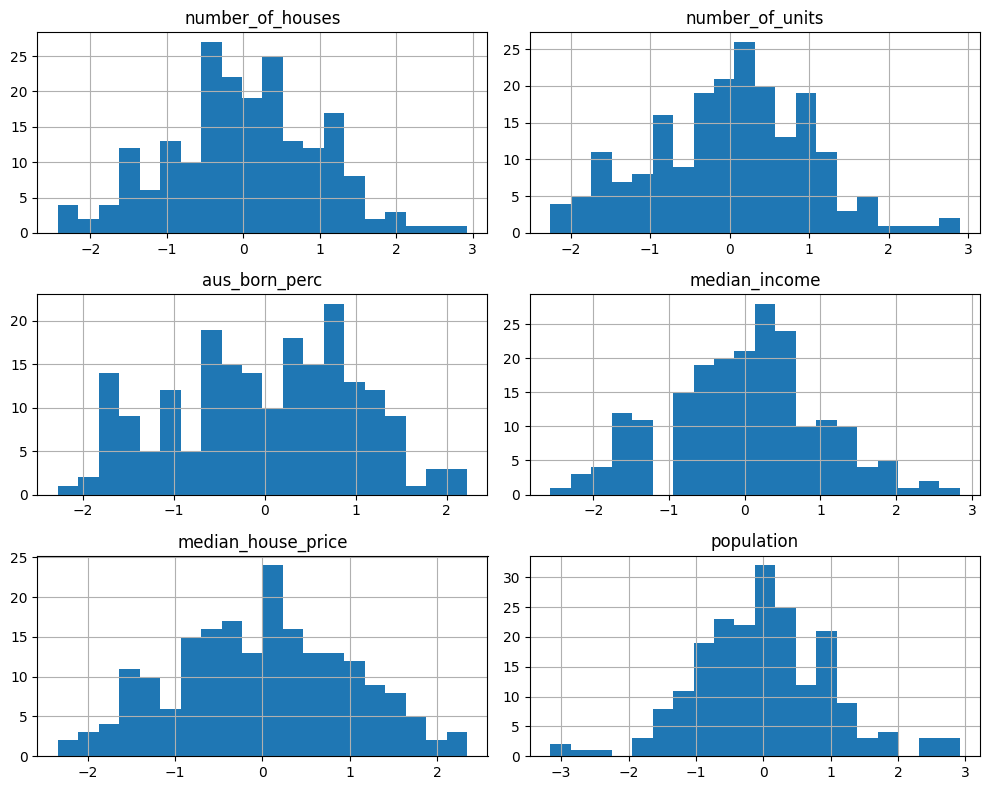

In [174]:
# Histograms for distributions
data_power[suburb_num_cols].hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()

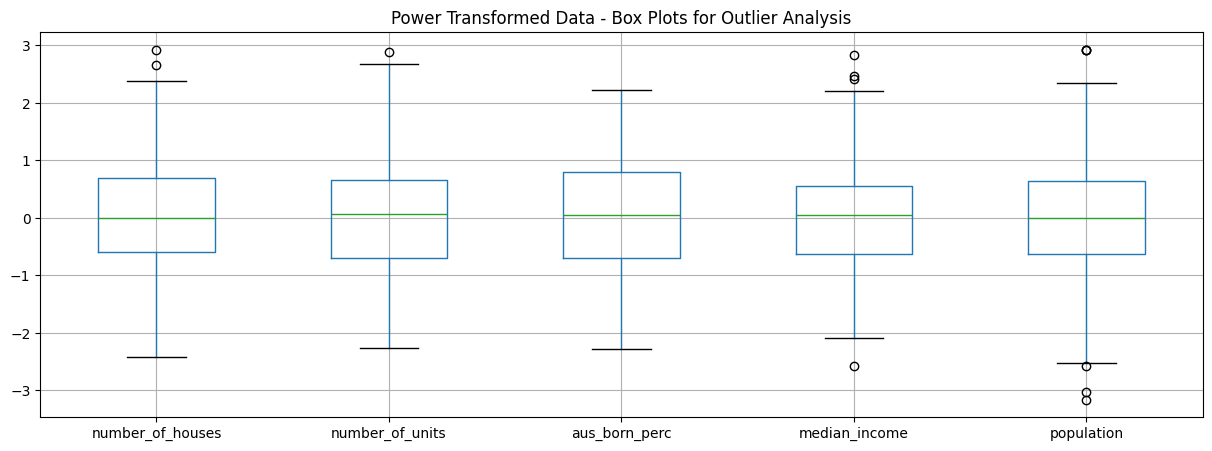

In [175]:
# Create the boxplot to identify the outliers
data_power[suburb_feature_cols].boxplot(figsize=(15, 5))
plt.title("Power Transformed Data - Box Plots for Outlier Analysis")
plt.show()

Power Transformation effectively reduces skewness and stabilizes variance, making data more Gaussian-like. It also mitigates the impact of outliers better than standardization, Min-Max Scaling, or log transformation, providing a more balanced and reliable dataset for modeling.

<div class="alert alert-block alert-warning">

## 6.  Evaluate Normalization Transformations  <a class="anchor" name="transform"></a>

</div>

From the transformation and normalization forms above, it can be seen at a glance that Power Transformation is the most suitable for this data. But is it true that this transformation is the most suitable for building a linear model in this case? Next, there are four ways to find out.

In [184]:
# Correlation comparison for different transformations
transformations = {
    'Original': suburb_info[suburb_num_cols],
    'Standardized': data_standardized,
    'Min-Max': data_minmax,
    'Log': data_log,
    'Power': data_power
}

<div class="alert alert-block alert-info">
   
### 6.1. Compare Correlations with the Target Variable <a class="ancho" name="corr"></a>

</div>

Correlations quantify the strength and direction of the linear relationship between features and the target variable (median_house_price). Higher correlations after normalization suggest that the transformation effectively enhances linearity, making features more suitable for regression. For this evaluation, each normalized dataset (standardized, Min-Max scaled, log-transformed, and power-transformed) is compared with the original features. A transformation is considered effective if it increases correlations consistently across features, as stronger linear relationships typically result in better model predictions and reduced residual variance.

In [185]:
# Calculate correlations with median_house_price
for name, transformed_data in transformations.items():
    if isinstance(transformed_data, pd.DataFrame):
        corr = transformed_data.corrwith(suburb_info['median_house_price'])
    else:
        corr = pd.DataFrame(transformed_data, columns=suburb_feature_cols).corrwith(transformed_data['median_house_price'])
    print(f"Correlations ({name}):\n{corr}\n")


Correlations (Original):
number_of_houses     -0.104490
number_of_units       0.343858
aus_born_perc         0.303860
median_income         0.719384
median_house_price    1.000000
population           -0.287242
dtype: float64

Correlations (Standardized):
number_of_houses     -0.104490
number_of_units       0.343858
aus_born_perc         0.303860
median_income         0.719384
median_house_price    1.000000
population           -0.287242
dtype: float64

Correlations (Min-Max):
number_of_houses     -0.104490
number_of_units       0.343858
aus_born_perc         0.303860
median_income         0.719384
median_house_price    1.000000
population           -0.287242
dtype: float64

Correlations (Log):
number_of_houses     -0.058902
number_of_units       0.315883
aus_born_perc         0.315366
median_income         0.682847
median_house_price    0.975004
population           -0.156638
dtype: float64

Correlations (Power):
number_of_houses     -0.062772
number_of_units       0.330699
aus_born_p

The correlations between features and median_house_price remained similar across all normalization techniques, indicating no significant advantage for any specific method in strengthening linear relationships.

<div class="alert alert-block alert-info">
   
### 6.2. Visualize Linearity with Scatter Plots <a class="anchor" name="scatter"></a>

</div>

Scatter plots between each normalized feature and the target variable provide visual confirmation of the linear relationship. Ideal transformations produce a clear linear trend, reducing the influence of outliers and non-linear patterns. By overlaying scatter plots for all normalization types, we can identify which transformation reduces noise and brings the data closer to satisfying linear regression assumptions. This step complements the correlation analysis, as it visually validates the strength of observed relationships.

Scatter Plots for Original Transformation:


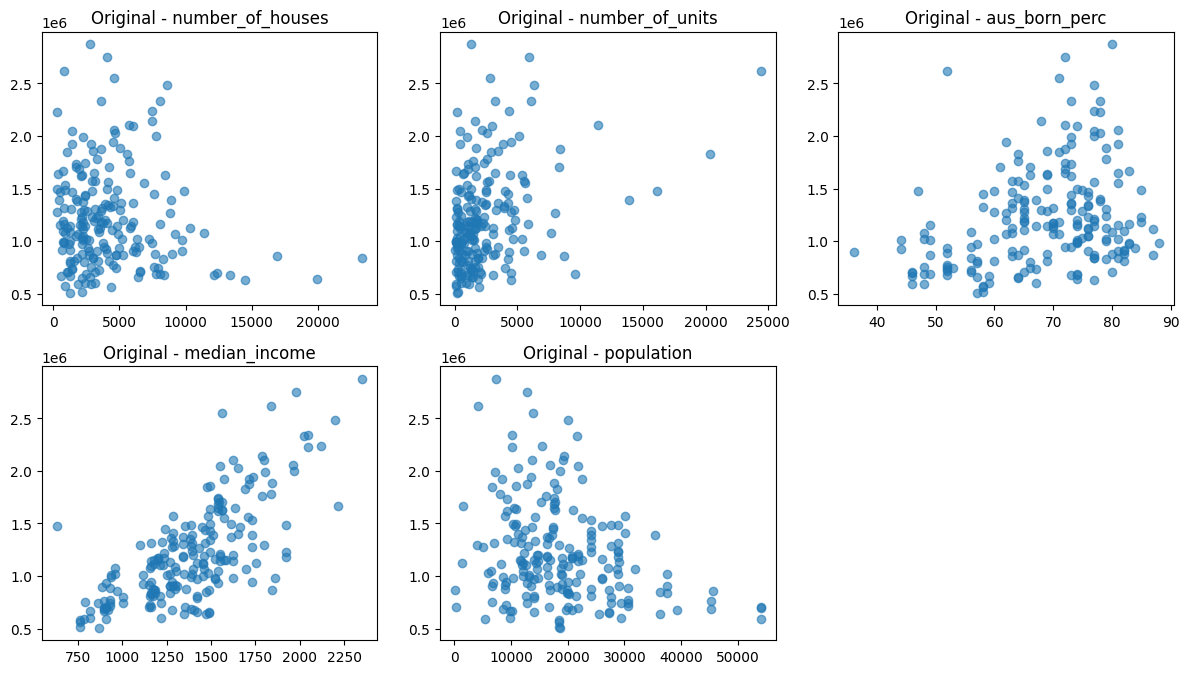

Scatter Plots for Standardized Transformation:


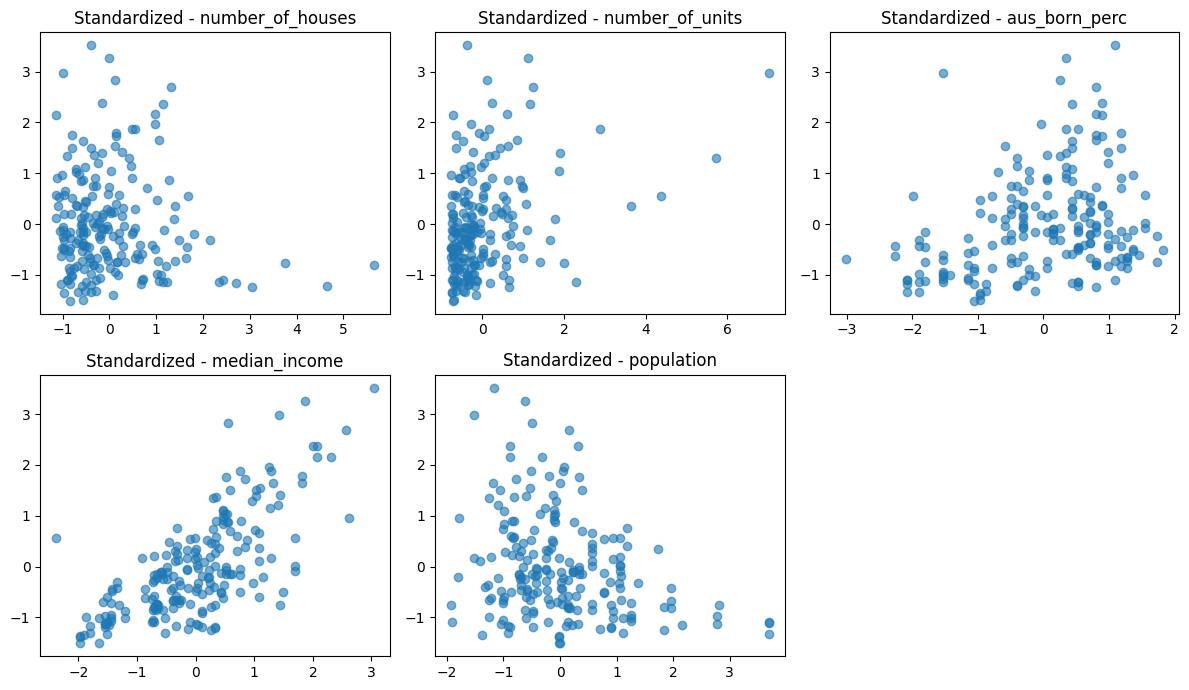

Scatter Plots for Min-Max Transformation:


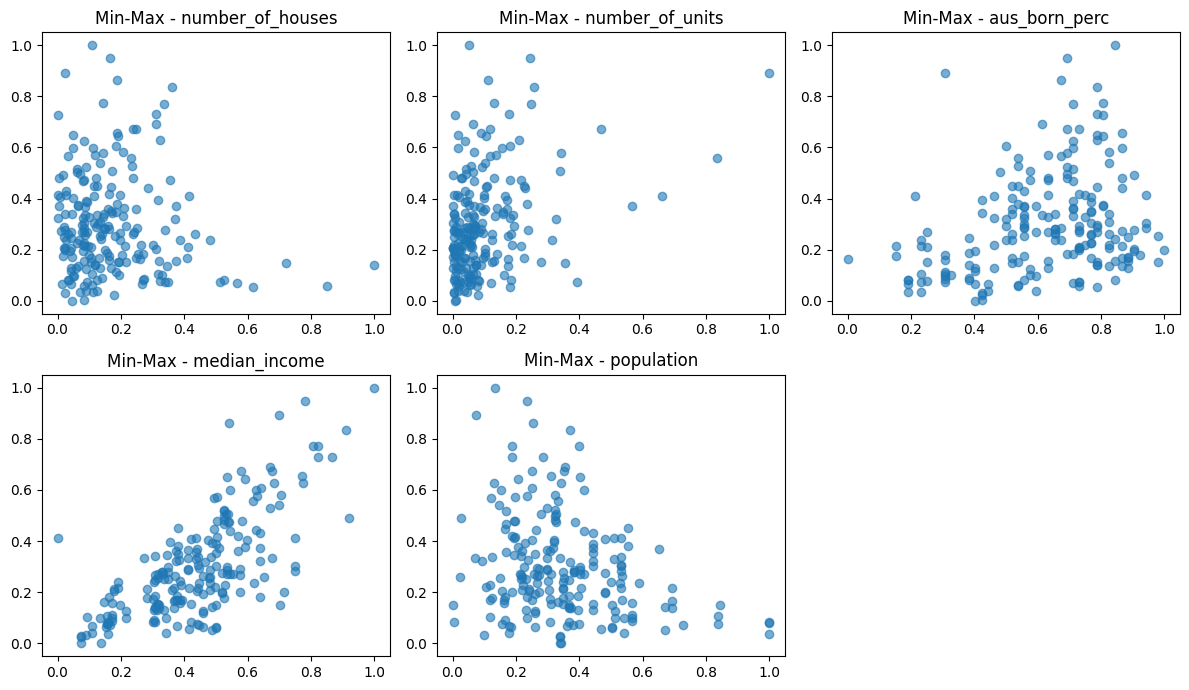

Scatter Plots for Log Transformation:


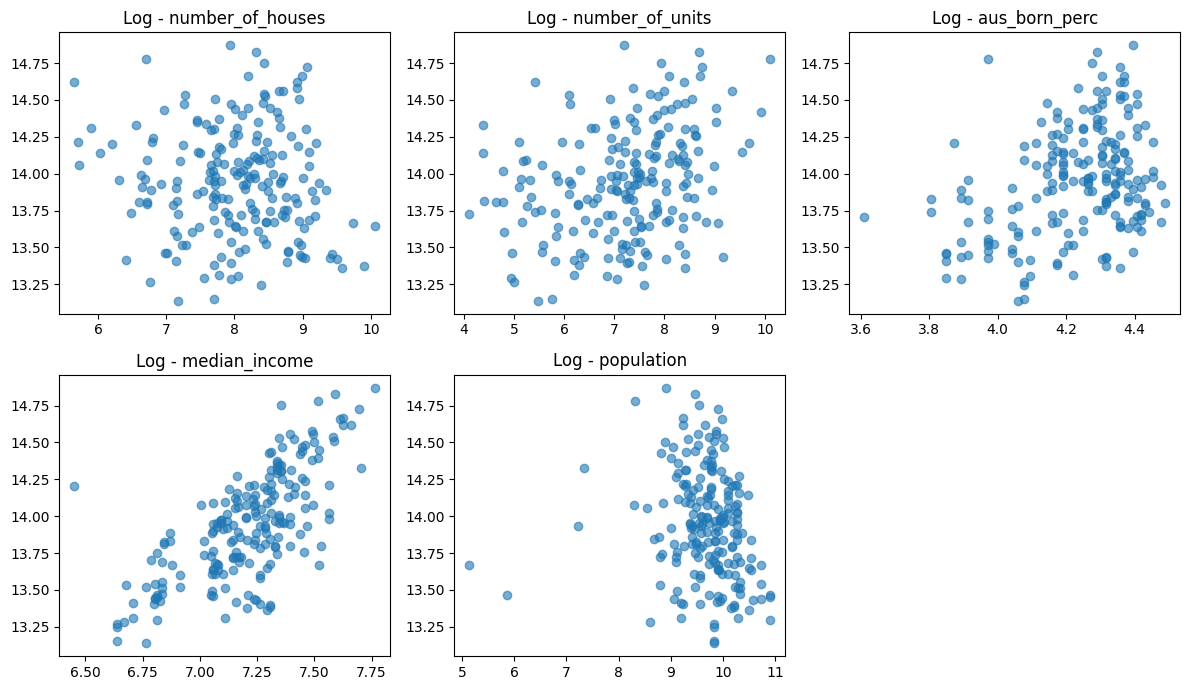

Scatter Plots for Power Transformation:


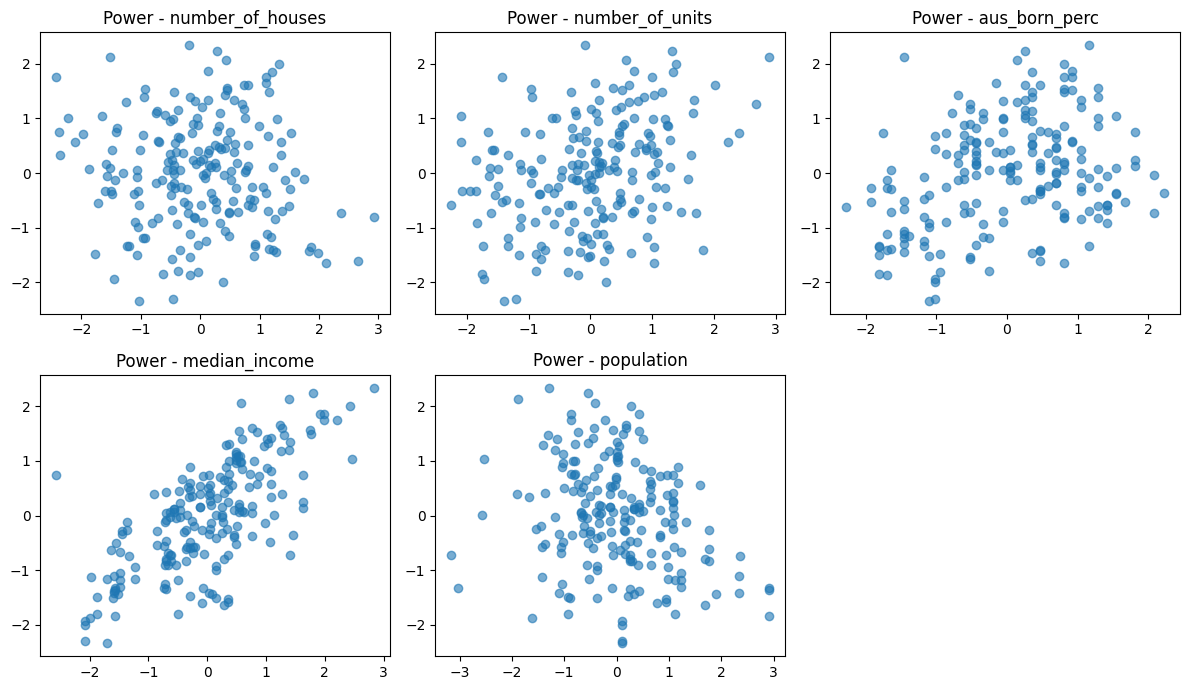

In [186]:
# Scatter plots for each transformation
for name, transformed_data in transformations.items():
    plt.figure(figsize=(12, 7))
    print(f"Scatter Plots for {name} Transformation:")
    for i, column in enumerate(suburb_feature_cols):
        plt.subplot(2, 3, i + 1)
        if isinstance(transformed_data, pd.DataFrame):
            plt.scatter(transformed_data[column], transformed_data['median_house_price'], alpha=0.6)
        else:
            plt.scatter(transformed_data[:, i], transformed_data['median_house_price'], alpha=0.6)
        plt.title(f'{name} - {column}')
    plt.tight_layout()
    plt.show()


The scatter plots for most of the techniques appear messy with no significant trend improvement, except for the log and power transformations. However, most scatter plots except for the median_income variable still do not show a clear pattern.

<div class="alert alert-block alert-info">
   
### 6.3. Check Normality of Feature Distributions <a class="anchor" name="QQ"></a>

</div>

Using Q-Q plots or histograms, we assess whether normalized features approximate a normal distribution, as linear regression assumes normality in feature distributions for unbiased coefficients and reliable predictions. Transformations like log and power are evaluated for their ability to symmetrize skewed distributions and reduce long tails. A feature that aligns closely with a straight line on a Q-Q plot after transformation is deemed to have improved normality, directly supporting regression model assumptions.

Q-Q Plots for original Transformation:


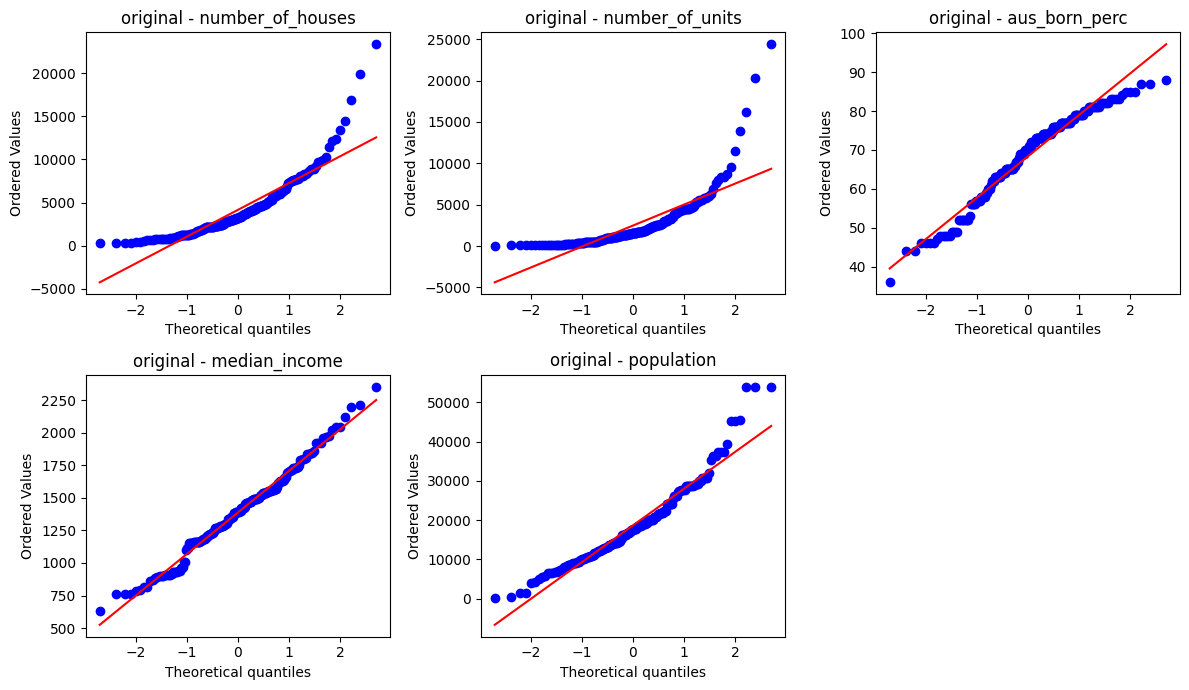

Q-Q Plots for standardized Transformation:


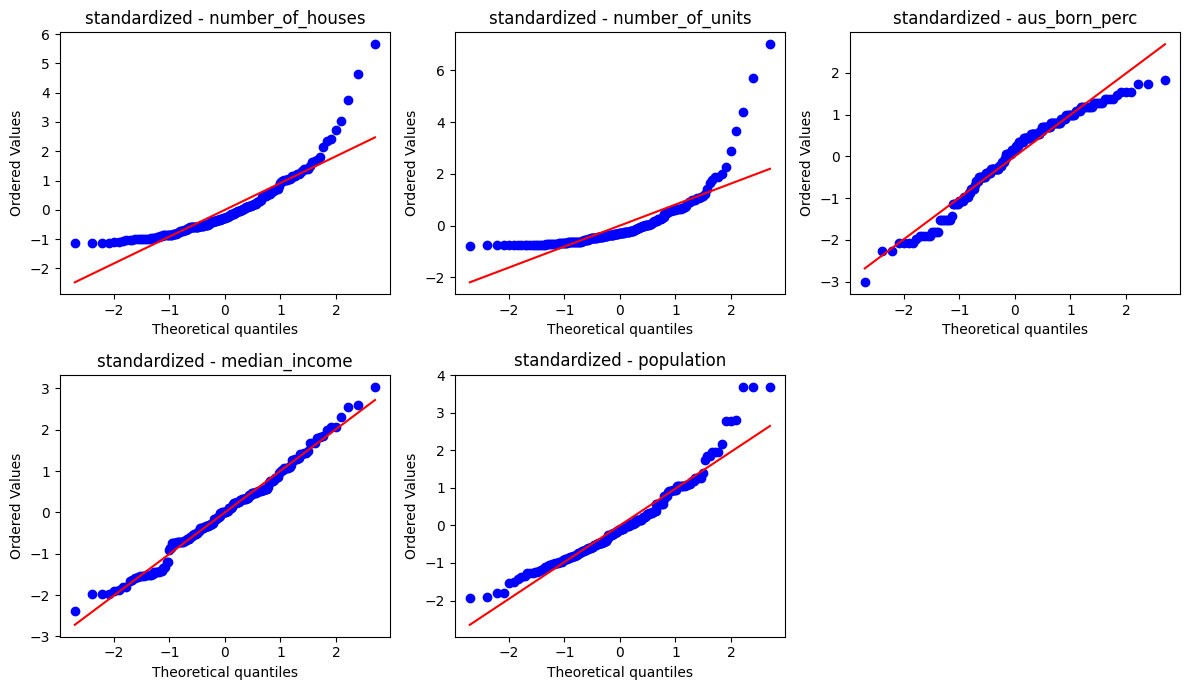

Q-Q Plots for minmax Transformation:


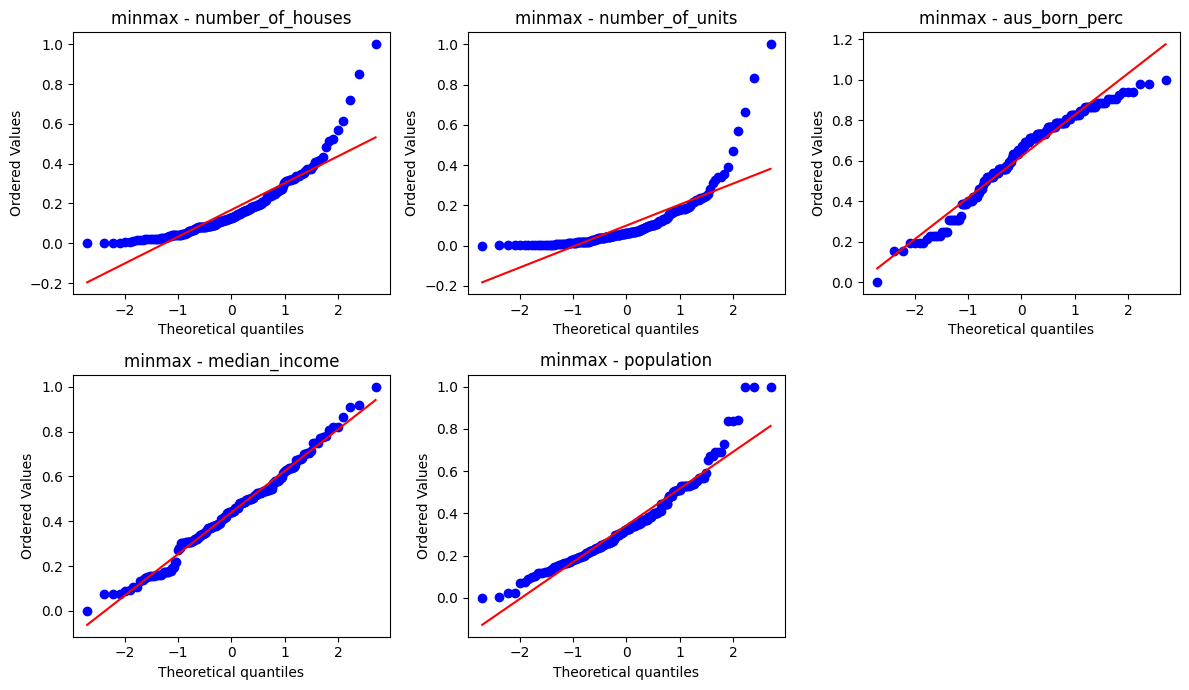

Q-Q Plots for log Transformation:


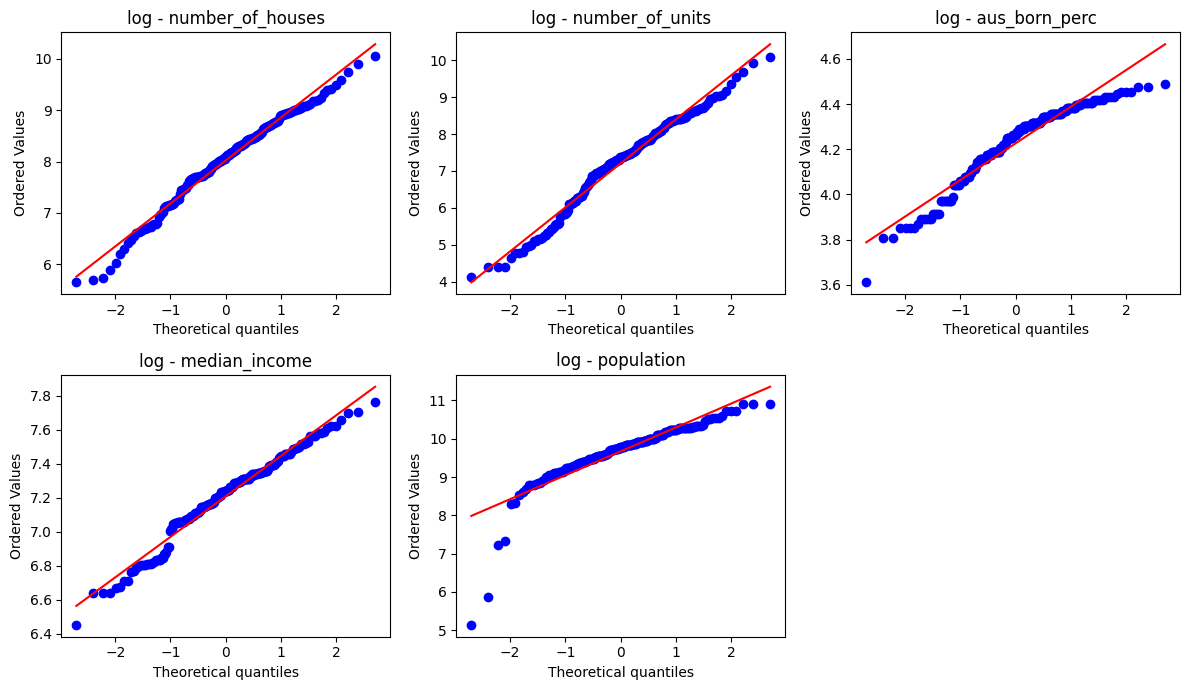

Q-Q Plots for power Transformation:


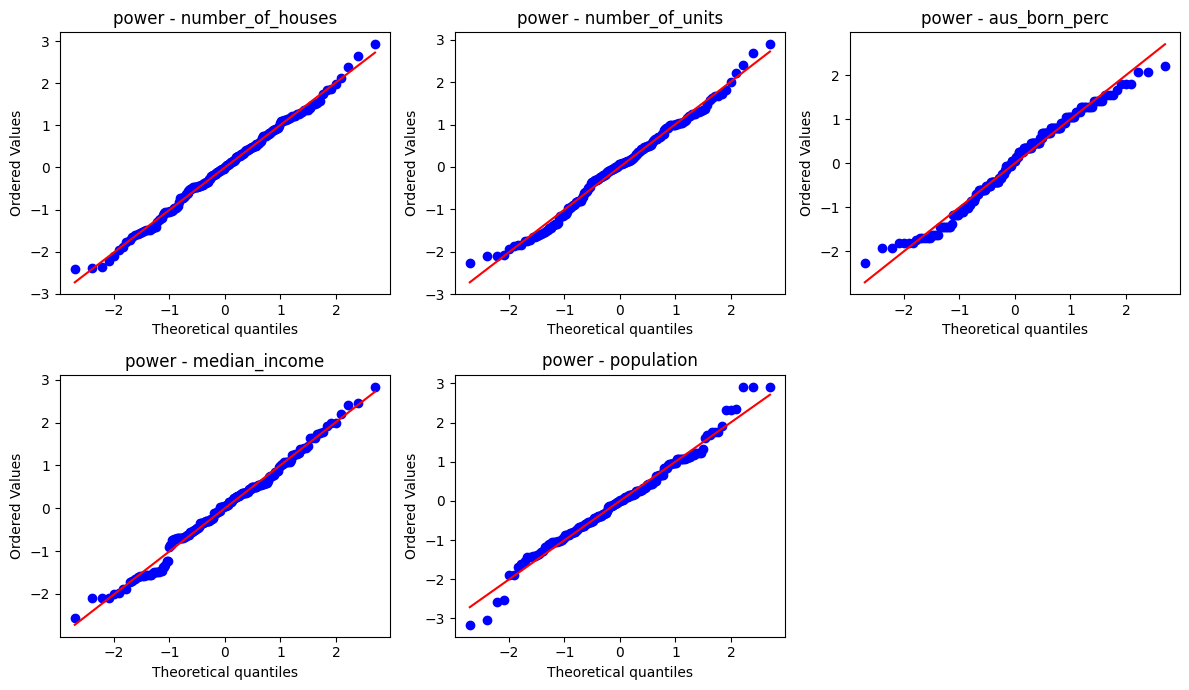

In [181]:
# Q-Q plots for each transformation
import scipy.stats as stats

for name, transformed_data in transformations.items():
    plt.figure(figsize=(12, 7))
    print(f"Q-Q Plots for {name} Transformation:")
    for i, column in enumerate(suburb_feature_cols):
        plt.subplot(2, 3, i + 1)
        if isinstance(transformed_data, pd.DataFrame):
            stats.probplot(transformed_data[column], dist="norm", plot=plt)
        else:
            stats.probplot(transformed_data[:, i], dist="norm", plot=plt)
        plt.title(f'{name} - {column}')
    plt.tight_layout()
    plt.show()


Log and power transformations improved normality significantly, producing neat Q-Q plots. However, outliers remained visible in log-transformed features, while power transformation achieved a more consistent and symmetrical distribution across variables.

<div class="alert alert-block alert-info">
   
### 6.4. Evaluate Homoscedasticity <a class="anchor" name="residual"></a>

</div>

Homoscedasticity, or constant variance of residuals, is a crucial assumption for linear regression. By visualizing residual plots after fitting a simple linear regression model, we determine whether a transformation stabilizes variance. Effective normalization techniques produce residuals that are randomly scattered around zero, without patterns or clusters. This step ensures that the transformations address heteroscedasticity and provide more reliable regression coefficients, thereby improving the model’s validity.

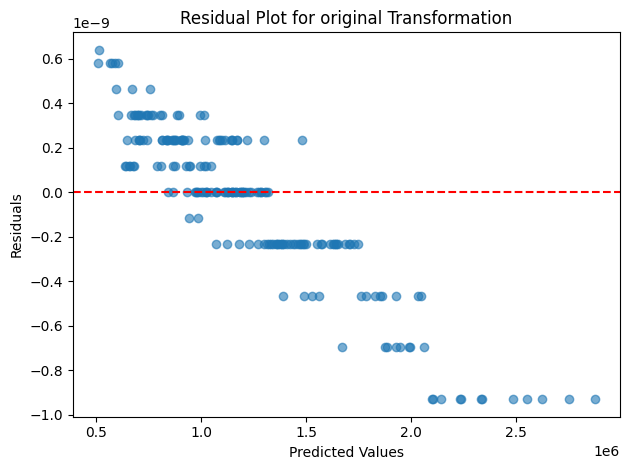

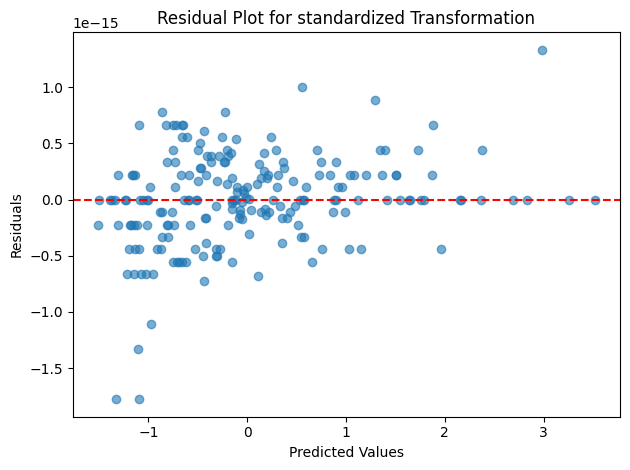

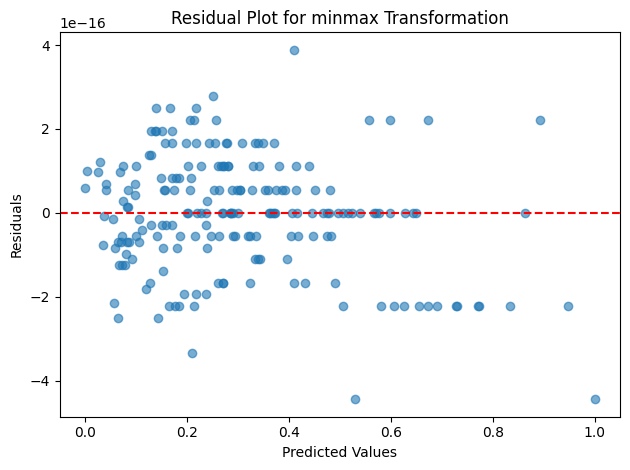

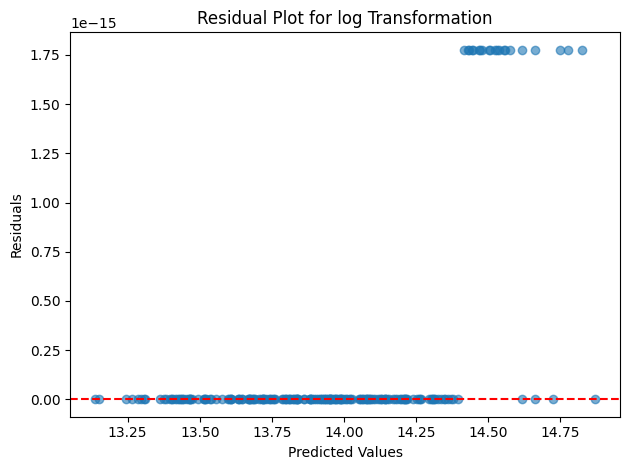

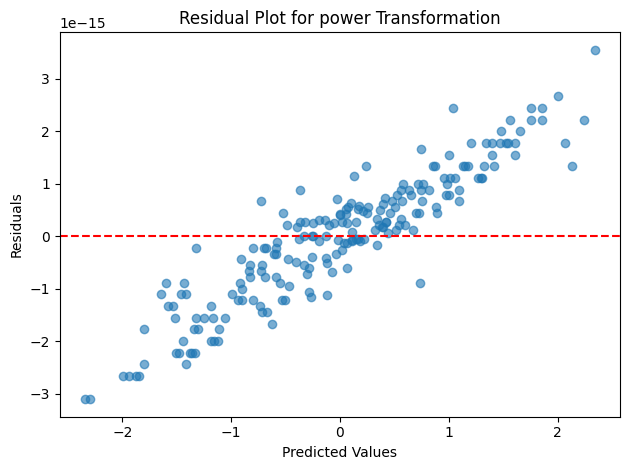

In [182]:
for name, transformed_data in transformations.items():
    # Fit a simple linear regression model
    model = LinearRegression()
    if isinstance(transformed_data, pd.DataFrame):
        X = transformed_data
    else:
        X = pd.DataFrame(transformed_data, columns=suburb_feature_cols)
    model.fit(X, transformed_data['median_house_price'])
    residuals = transformed_data['median_house_price'] - model.predict(X)

    # Plot residuals
    plt.scatter(model.predict(X), residuals, alpha=0.6)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'Residual Plot for {name} Transformation')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.tight_layout()
    plt.show()


The residual plots show no clear pattern for all techniques except power transformation. The residuals of the power transformed features are linearly distributed,  indicating consistent variance and better alignment with regression assumptions.

<div class="alert alert-block alert-warning">

## 7.  Summary  <a class="anchor" name="summary"></a>

</div>

Based on the analysis, the power transformation proved to be the most effective for preparing the data. It normalized the features, reduced skewness, and minimized the presence of outliers, making it particularly suitable for this dataset of around 200 records. Additionally, Q-Q plots showed that power-transformed features were the most stable, and residual plots revealed a clear linear distribution compared to other transformations, which exhibited unclear patterns. This makes power transformation the optimal choice for enhancing the dataset’s readiness for linear regression.

<div class="alert alert-block alert-warning">

## 8.  References  <a class="anchor" name="Ref"></a>

</div>

1. Min-Max Scaler, *Scikit-learn Documentation*, https://scikit-learn.org/1.5/modules/generated/sklearn.preprocessing.MinMaxScaler.html, Accessed 13/11/2024.
2. Power Transformer, *Scikit-learn Documentation*, https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.PowerTransformer.html, Accessed 13/11/2024.
3. Q-Q Plots, *ChatGPT*, https://chatgpt.com, Accessed 15/11/2024.
4. Residual Plot, *ChatGPT*, https://chatgpt.com, Accessed 16/11/2024.